# Montagem do ambiente e estabelecimento dos arquivos

In [235]:
import pandas as pd

In [236]:
# Carregando os dataframes extratificados
df = pd.read_csv('resultados.csv')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image_dr           35 non-null     object 
 1   Nome do an ncio    35 non-null     object 
 2   Tipo de resultado  33 non-null     object 
 3   Resultados         35 non-null     int64  
 4   Valor usado (BRL)  35 non-null     float64
 5   file_path          35 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ KB


In [238]:
df.head()

,image_dr,Nome do an ncio,Tipo de resultado,Resultados,Valor usado (BRL),file_path
0,001.jpg,00 - AD - [BURGER DO M S] AGOSTO,Compras no site,566,581.56,stakeholder_images\001.jpg
1,002.jpg,00 - AD - [BURGER DO M S] JULHO,Compras no site,60,105.64,stakeholder_images\002.jpg
2,003.jpg,00 - AD - [BURGER DO M S] JUNHO,Compras no site,8,7.64,stakeholder_images\003.jpg
3,004.jpg,00 - AD01 - [FOTO] Smash todo dia!,Compras no site,100,187.50,stakeholder_images\004.jpg
4,005.jpg,00 - AD02 - VENDAS,Compras no site,149,171.85,stakeholder_images\005.jpg


In [239]:
path = "stakeholder_images"
label = 'Resultados'

Caminho: 0    stakeholder_images\001.jpg
Name: file_path, dtype: object


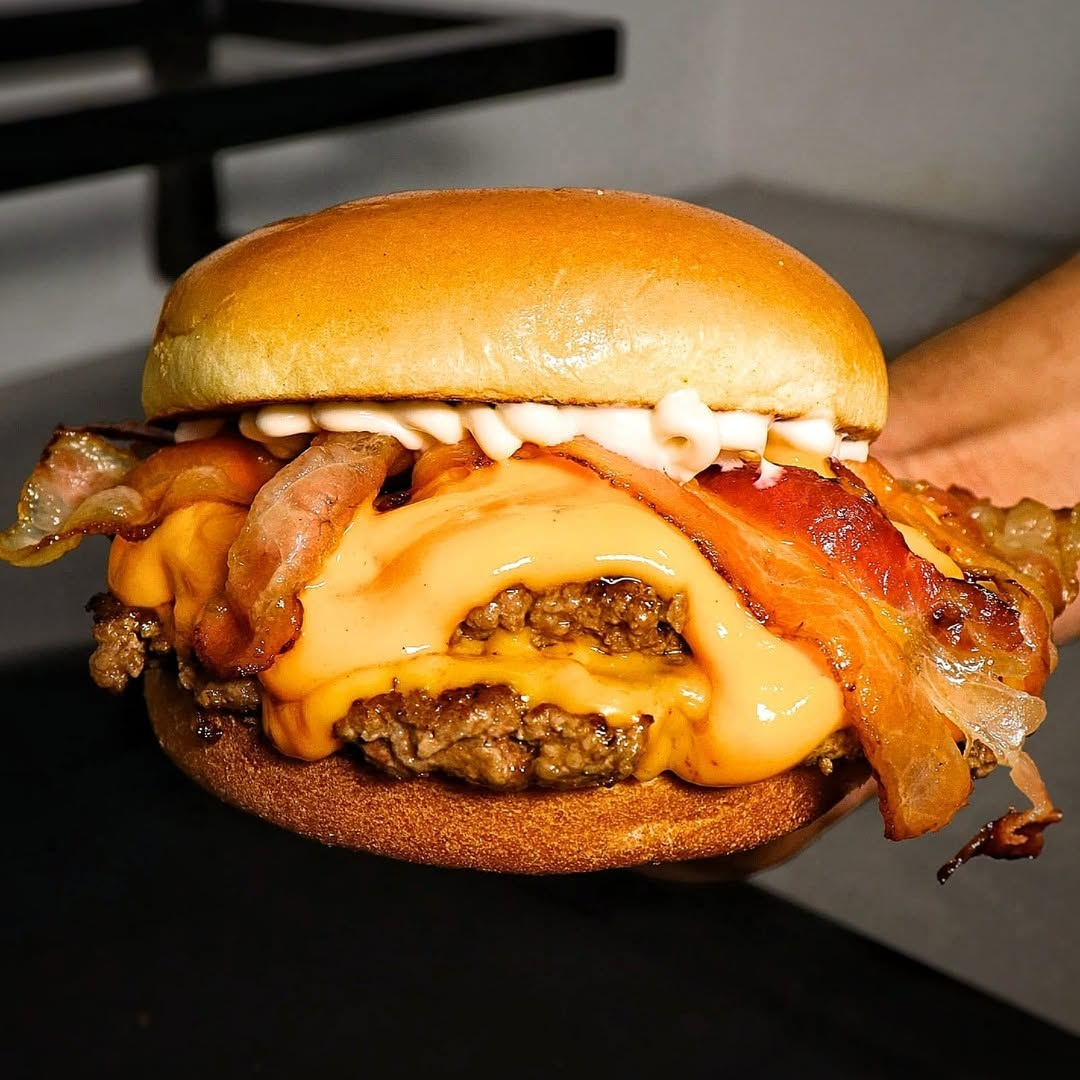

Rótulo: 0    566
Name: Resultados, dtype: int64


In [240]:
from IPython.display import Image, display

Imagem_exemplo ='001.jpg'
Rótulo_exemplo = df.loc[df['image_dr'] == Imagem_exemplo, label]
Caminho_Exemplo = df.loc[df['image_dr'] == Imagem_exemplo, 'file_path']
print(f'Caminho: {Caminho_Exemplo}')

display(Image(filename=Caminho_Exemplo[0]))
print(f'Rótulo: {Rótulo_exemplo}')

In [241]:
from tensorflow.config import list_physical_devices as devices_list

In [242]:
print(devices_list('GPU'))

[]


# Investigação da Rede Convolucional Pré-Treinada

In [243]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input


In [244]:
# Com topo incluso
m_top = MobileNet(weights='imagenet', include_top=True, input_shape=(224,224,3))
print(f"Dimensões de entrada:", m_top.input_shape)

Dimensões de entrada: (None, 224, 224, 3)


In [245]:
# Tentando re-shape de entrada
try:
  m_top_reshape = MobileNet(weights='imagenet', include_top=True, input_shape=(256,256,3))
except Exception as e:
  print(e)
else:
  print(f"Dimensões de entrada:", m_top.input_shape)

When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (224, 224, 3).  Received: input_shape=(256, 256, 3)


In [246]:
# Sem topo incluso
m_base = MobileNet(weights='imagenet', include_top=False, pooling=None, input_shape=(384,512,3))
print(f"Dimensões de entrada:", m_base.input_shape)

C:\Users\fnsb\AppData\Local\Temp\ipykernel_23700\19612820.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  m_base = MobileNet(weights='imagenet', include_top=False, pooling=None, input_shape=(384,512,3))


Dimensões de entrada: (None, 384, 512, 3)


In [247]:
m_top.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_94 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [248]:
m_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_95 (InputLayer)     │ (None, 384, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 192, 256, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 192, 256, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 192, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 192, 256, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 192, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 192, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 192, 256, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 192, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 192, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 193, 257, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 96, 128, 64)    │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 96, 128, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 96, 128, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 96, 128, 128)   │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 96, 128, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 96, 128, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 96, 128, 128)   │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 96, 128, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 96, 128, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 96, 128, 128)   │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 96, 128, 128)   │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Recriação do Topo e Ajuste Fino

In [249]:
import os, numpy as np, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import CSVLogger
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm

In [250]:
paths_imagens = df['file_path']
y = df['Resultados']

In [251]:
# MobileNet Imagenet exige que o formato dos tensores seja quadrado com uma das seguintes dimensões: [128, 160, 192, 224]
# Se um formato diferente for estipulado, o treinamento retorna um aviso dizendo que o padrão [224x224] foi imposto
IMG_SIZE = (224, 224)

In [252]:
# Retorna um tensor a partir do caminho da imagem

def load_image(path):
    img = tf.io.read_file(path)    # lê a imagem
    img = tf.image.decode_jpeg(img, channels=3)    # converte a imagem em tensor
    img = tf.image.resize(img, IMG_SIZE, method='bicubic', antialias=True)    # Redimensiona o tensor para o tamanho alvo
    img = tf.keras.applications.mobilenet.preprocess_input(tf.cast(img, tf.float32))    # Normaliza os valores do tensor para [-1,1]
    return img

In [253]:
print(f'três canais do primeiro pixel da primeira imagem: {load_image(df['file_path'][0])[0][0]}')
print(load_image(df['file_path'][0]).shape)

três canais do primeiro pixel da primeira imagem: [-0.32425433 -0.35657138 -0.3797859 ]
(224, 224, 3)


In [254]:
# Retorna um dataset do Tensorflow

def make_ds(paths, ys, batch_size):
    X = tf.data.Dataset.from_tensor_slices(paths).map(load_image, num_parallel_calls=tf.data.AUTOTUNE)  # Cria um dataset de tensores
    Y = tf.data.Dataset.from_tensor_slices(ys)    # Cria um dataset de rótulos
    ds = tf.data.Dataset.zip((X, Y)).batch(batch_size).prefetch(tf.data.AUTOTUNE)    # Emparelha tensores e rótulos e cria os batches
    return ds

In [255]:
ds_test = make_ds(paths_imagens, y, 5)
print(type(ds_test))
print(ds_test.element_spec)
print(ds_test.cardinality())

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
tf.Tensor(7, shape=(), dtype=int64)


In [256]:
# carrega Backbone e treina Head

def build_model(lr=1e-3):
    base = keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=IMG_SIZE+(3,)) # Carrega o backbone do modelo pré-treinado
    base.trainable = False     # Congela os pesos do backbone
    inp = keras.Input(shape=IMG_SIZE+(3,), name='included_input')    # Cria da entrada da rede
    x = base(inp, training=False)  # Adciona o backbone à entrada e impede que as camadas de BatchNormalization sejam alteradas durante o treino
    x = layers.GlobalAveragePooling2D(name='GAP_Head')(x)   # Adiciona uma camada de média global espacial por canal (substitui Flatten para amostra pequena)
    out = layers.Dense(1, activation='softplus', name='Regressor')(x)    # Adiciona uma camada regressora com uma saída
    model = keras.Model(inp, out)    # Instancia o grafo final
    model.compile(optimizer=keras.optimizers.Adam(lr), 
                  loss='mse', 
                  metrics=['mse','mae'], 
                  jit_compile="auto", 
                  steps_per_execution=16)   # Define otimizador e métrica da regressão
                                           # Otimizador: Adam
                                           # Taxa de aprendizagem: 0.001
                                           # Métrica de treino: mse
                                           # Métrica de validação: mae
    return model, base

Incluir ativação 'softplus' em vez de 'linear' na camada preditora evita resultados negativos, o que está mais de acordo com a natureza da variável alvo.

In [257]:
model_test, base_test = build_model()
model_test.summary()

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ included_input (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GAP_Head                        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Regressor (Dense)               │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [258]:
# Prepara o modelo para o fine-tuning, descongelando camadas e estipulando a taxa de aprendizagem

def finetune(model, base, lr=1e-5, n_unfreeze=20):
    # Descongela n camadas, da saída para a entrada
    if n_unfreeze > 0:
      for layer in base.layers[-n_unfreeze:]:
          if not isinstance(layer, layers.BatchNormalization):
              layer.trainable = True
    model.compile(optimizer=keras.optimizers.Adam(lr), 
                  loss='mse', metrics=['mse','mae'], 
                  jit_compile="auto", 
                  steps_per_execution=16)

In [259]:
finetune(model_test, base_test)
model_test.summary()

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ included_input (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GAP_Head                        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Regressor (Dense)               │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,854,465 (7.07 MB)

 Non-trainable params: 1,375,424 (5.25 MB)

Descongelando 20 camadas, os parámetros treináveis sobem de 1 025 para 1 854 465.

In [260]:
# Integração do Leave One Out Cross-Validation com o ajuste fino do modelo
def fitting_loocv(paths, y, batch_size=8, epochs_head=20, epochs_ft=10, n_unfreeze=1, lr_head=1e-3, lr_ft=1e-5):
    diretório = f'reports\\fits_csv\\hdep_{epochs_head}\\ftep_{epochs_ft}\\uf_{n_unfreeze}\\hdlr_{lr_head}\\ft_lr{lr_ft}'
    loo = LeaveOneOut()      # O módulo do Scikit Learn se encarrega da iteração entre os folds
    evaluate = []
    y_true_oof = []    # Rótulos reais out-of-fold
    y_pred_oof = []    # Rótulos previstos out-of-fold
    for fold, (tr_idx, te_idx) in enumerate(tqdm(loo.split(paths), total=len(paths), desc="LOOCV"), 1):  # índices do dataset: n-1 índices de treino e 1 índice de teste
        tr_paths, te_paths = np.array(paths)[tr_idx], np.array(paths)[te_idx]    # Encontra os dados pelos índices
        tr_y, te_y = y[tr_idx], y[te_idx]                                        # Encontra os rótulos pelos índices
        ds_tr = make_ds(tr_paths, tr_y, batch_size=batch_size)     # Cria novo DataSet de treino
        ds_te = make_ds(te_paths, te_y, batch_size=1)   # Cria DataSet de teste

        model, base = build_model(lr_head)    # Extrai o modelo pré-treinado com head e input adaptados, e uma backbone imutável
        cb = [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]    # Define interrupção quando não houver melhora na validação
        model.fit(ds_tr, epochs=epochs_head, validation_data=ds_te, callbacks=cb, verbose=0)   # Treina somente a head (descongelada)

        # Para salvar csv com as métricas por época
        os.makedirs(diretório, exist_ok=True)
        csv = CSVLogger(f'{diretório}\\fold_{fold:03d}ft.csv', separator = ',', append=False)

        finetune(model, base, lr=lr_ft, n_unfreeze=n_unfreeze)    # Descongela camadas e define nova taxa de aprendizagem
        model.fit(ds_tr, epochs=epochs_ft, validation_data=ds_te, callbacks=[cb, csv], verbose=0)    # Treina novamente o modelo

        # Agregando a previsão
        y_pred = float(model.predict(ds_te, verbose = 0).ravel()[0])
        y_pred_oof.append(float(y_pred))
        y_true_oof.append(float(te_y.iloc[0]))

        # Salva as métricas alvo e de validação
        evaluate.append(model.evaluate(ds_te, verbose=0))

    pd.DataFrame({'y_true_oof': y_true_oof,'y_pred_oof': y_pred_oof}).to_csv(f'{diretório}\\resíduos.csv', index=False)
    r2_geral = r2_score(y_true_oof, y_pred_oof)
        
    return r2_geral, (y_true_oof, y_pred_oof)



In [261]:
# main

#r2, report = fitting_loocv(paths_imagens, y, epochs_head=10, epochs_ft=10, n_unfreeze=10, lr_head=1e-3, lr_ft=1e-5)
#print(report)

In [262]:
#r2

# Otimização de Hiperparâmetros com Random Search

In [263]:
import random
from datetime import datetime, timedelta

In [264]:
param_space = {
        'lr_head': [1e-4, 3e-3], 
        'lr_ft': [1e-6, 3e-4], 
        'ep_head': [5, 10, 15], 
        'ep_ft': [5, 8, 12],  
        'n_unfreeze': [1, 5, 10]
    }

In [265]:
def sample_hparams():
    return {
        'lr_head': random.choice(param_space['lr_head']), 
        'lr_ft': random.choice(param_space['lr_ft']), 
        'ep_head': random.choice(param_space['ep_head']), 
        'ep_ft': random.choice(param_space['ep_head']),  
        'n_unfreeze': random.choice(param_space['ep_ft']) 
    }

In [266]:
comb_total = 1
for i in param_space.values():
    comb_total *= len(i)

comb_total

108

In [267]:
def random_search(name = None, n_trials = 10, seed = 8,deadline_min = 120, test = False):
    if name == None:
        name = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    csv_path = f'reports\\random_search_{name}.csv'

    try:
        df = pd.read_csv(csv_path) #tenta carregar o csv como checkpoint
    except:
        trials = [] # se não conseguir, inicia as tentativas como uma lista vazia (já que não há checkpoint)
    else:
        trials = df.to_dict(orient='records') # caso contrário, cria o trials a partir do checkpoint

    random.seed(seed)
    np.random.seed(seed)
    t_done =  len(trials)
    rep = 0
    start = datetime.now()
    now = datetime.now()
    deadline = timedelta(minutes = deadline_min)

    while (t_done < n_trials) and (now-start < deadline) and (rep <= 10):   #  Limite de tentativas, de tempo e de repetições
        hparams = sample_hparams()

        # Garantindo que não há repetição de combinação de hiperparâmetros
        repetido = any(i['ep_head'] == hparams['ep_head'] and
                       i['ep_ft'] == hparams['ep_ft'] and
                       i['n_unfreeze'] == hparams['n_unfreeze'] and
                       i['lr_head'] == hparams['lr_head'] and
                       i['lr_ft'] == hparams['lr_ft']
                        for i in trials)
        
        if not repetido:
            rep = 0
            if test:
                r2 = random.random()
            else:
                print(f'trial {t_done}; hdep_{hparams['ep_head']}, ftep_{hparams['ep_ft']}, uf_{hparams['n_unfreeze']}, hdlr_{hparams['lr_head']}, ft_lr{hparams['lr_ft']}')
                r2, error = fitting_loocv(paths_imagens, 
                                    y, 
                                    epochs_head=hparams['ep_head'], 
                                    epochs_ft=hparams['ep_ft'], 
                                    n_unfreeze=hparams['n_unfreeze'], 
                                    lr_head=hparams['lr_head'], 
                                    lr_ft=hparams['lr_ft'])
            trials.append({
                'trial': t_done+1,
                **hparams,
                'r2':r2
            })
            t_done +=1

            df = pd.DataFrame(trials).sort_values('r2', ascending=False).reset_index(drop=True)
            df.to_csv(csv_path, index=False)

        else:
            rep +=1

        now = datetime.now()

    print('5 Melhores hiperparâmetros')
    print(df.head(5))
    return df

In [ ]:
df_hpsearch = random_search(name = '001',deadline_min = 90)

trial 1; hdep_5, ftep_5, uf_12, hdlr_0.0001, ft_lr1e-06


LOOCV: 100%|██████████| 35/35 [11:27<00:00, 19.65s/it]


trial 2; hdep_15, ftep_10, uf_12, hdlr_0.0001, ft_lr0.0003


LOOCV: 100%|██████████| 35/35 [16:59<00:00, 29.12s/it]


trial 3; hdep_5, ftep_5, uf_12, hdlr_0.003, ft_lr1e-06


LOOCV: 100%|██████████| 35/35 [12:24<00:00, 21.26s/it]


trial 4; hdep_15, ftep_10, uf_5, hdlr_0.003, ft_lr1e-06


LOOCV: 100%|██████████| 35/35 [17:06<00:00, 29.34s/it]


trial 5; hdep_10, ftep_5, uf_12, hdlr_0.003, ft_lr0.0003


LOOCV: 100%|██████████| 35/35 [16:29<00:00, 28.27s/it]


trial 6; hdep_5, ftep_15, uf_5, hdlr_0.003, ft_lr1e-06


LOOCV:  60%|██████    | 21/35 [18:33<26:23, 113.11s/it]

In [94]:
df_hpsearch_test = random_search(test=True)

5 Melhores hiperparâmetros
   trial  lr_head     lr_ft  ep_head  ep_ft  n_unfreeze        r2
0      4   0.0030  0.000001       15     10           5  0.991602
1      8   0.0001  0.000001       15      5          12  0.946051
2      7   0.0001  0.000300       15      5           5  0.946044
3      6   0.0030  0.000001       15      5           8  0.903392
4      3   0.0001  0.000300       15     10           8  0.902064
